Curve - A waveform manipulation and analysis library for Python
======================

Introduction
------------

The Curve class represents Y values that evolve as a function of X.

Example:

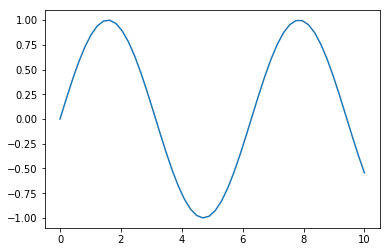

In [2]:
import numpy as np
from matplotlib.pyplot import *
from curve import Curve
%matplotlib inline

x = np.linspace(0, 10)
y = np.sin(x)
mycurve = Curve(x, y)

mycurve.plot()

The class provides several operations for the data within the class:

Example:

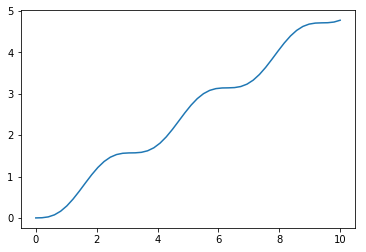

In [3]:
sq_curve = mycurve**2
int_curve = sq_curve.integrate().plot()

It is also possible to carry out operations between Curve's even is their
x-axis values don't match:

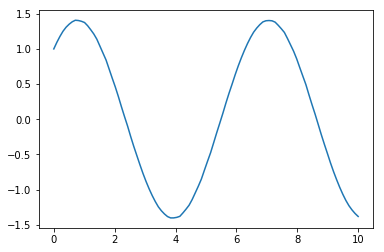

In [4]:
x1 = np.linspace(0, 10, num=30)
x2 = np.linspace(0, 10, num=100)
y1 = np.sin(x1)
y2 = np.cos(x2)
sum_curve = Curve(x1, y1) + Curve(x2, y2)
sum_curve.plot()

Curve API
==========

Curve(data, y=None, dtype=float)
--------------------------------

```
Initilizes the Curve object with data.

Usage:

    mycurve = Curve(x, y)

or

    mycurve = Curve([x, y])

:param data: A 2xn (or nx2) list or Numpy array, or a 1-d vector
             for the x-axis values (In this case, must also provide
             the y parameter).
:param y: 1-d vector of y-axis values correspondind to the x-axis
          values provided in the data parameter. If this is not
          provided it assumes that data contains both x and y-axis data
          in a 2-times-n data structure.
:param dtype: Type in which the data is stored.
```

Addition: curve + other
-----------------------

```other``` may be a scalar or a Curve.



Multiplication: curve * other
-----------------------------

```other``` may be a scalar or a Curve.

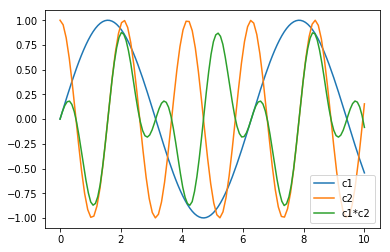

In [5]:
x1 = np.linspace(0, 10, num=130)
x2 = np.linspace(0, 10, num=100)
y1 = np.sin(x1)
y2 = np.cos(x2 * 3)
c1 = Curve(x1, y1)
c2 = Curve(x2, y2)
c1.plot(label='c1')
c2.plot(label='c2')
(c1 * c2).plot(label='c1*c2')
legend();

Division: curve / other
-----------------------

```other``` may be a scalar or a Curve. Reverse division, i.e., ```other / curve```, when other is a scalar is also supported.

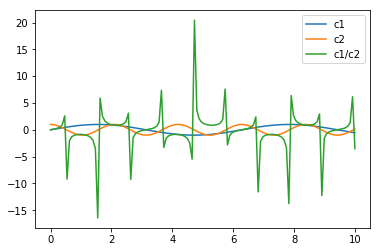

In [6]:
c1.plot(label='c1')
c2.plot(label='c2')
(c1 / c2).plot(label='c1/c2')
legend();

Power: curve ** other
---------------------

Only scalar values of ```other``` are supported at this time.

Negative: -curve
----------------

Inverts the sign of the y-axis values.

curve.x
-------

X-axis values

curve.y
-------

Y-axis values

curve.duration
--------------

The difference between the first and last X-axis values.

curve.check(fix=0)
------------------

```
Check for proper data (Monotonicity of the x-axis values).
Fix it if necessary by sorting (x, y) pairs by x.

:param fix: Fix non-monotonicity in the x-axis by sorting (x, y) pairs by x.
            Default is False.
```

curve.at(value, interpolate=True)
---------------------------------

```
Returns y(x=value), interpolating values (trapezoid), otherwise
returns y for the closest existing x < value. If values is
a list, returns a list of corresponding values of y.

:param value: X-axis value(s) for which the Y-axis value(s) is(are) returned.
              May be a list/Numpy array of values or a scalar (float/int).
:param interpolate: Wheather to interpolate between closest X values,
                    or to approximate to the nearest available.
                    Default is True.
:return: Corresponding Y-axis value(s).
```

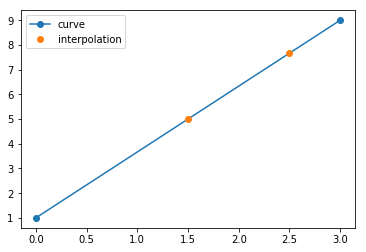

In [7]:
curve = Curve([0, 3], [1, 9])
x = [1.5, 2.5]
y = curve.at(x)

plot(curve.x, curve.y, 'o-', label='curve')
plot(x, y, 'o', label='interpolation')
legend();

curve.resample(max_grow=10)
---------------------------

```
Resamples the curve at uniform intervals. It chooses the minumum existing
spacing between x-axis values as the sampling period unless the resulting
number of samples is greater than max_grow times the current number of samples.
In such case, the period is set to be such that the resulting number of
samples is exactly max_grow times the current number of samples.

:param max_grow: Maximum allowed increase in number of data points.
:return: Resulting resampled curve.
```

curve.envelope()
----------------

```
Calculates the envelope of the curve. Uses the hilbert function from
scipy.signal.

:return: Envelope curve.
```

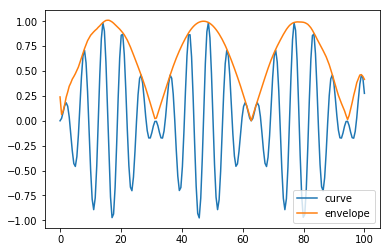

In [8]:
x = np.linspace(0, 100, num=200)
y = np.sin(x/10) * np.sin(x)
curve = Curve(x, y)
env = curve.envelope()

curve.plot(label='curve')
env.plot(label='envelope')
legend();

curve.envelope2(tc=None, numpoints=101)
---------------------------------------

```
Calculates the envelope of the curve. Slices the curve into uniform intervals
and computes the maximum of the interval to determine the envelope.

:param tc: Interval width for computing the maximum as the envelope.
           If not provided, tc = duration / (numpoints - 1).
:param numpoints: Used if tc is not provided to calaculate tc.
:return: Envelope curve.
```

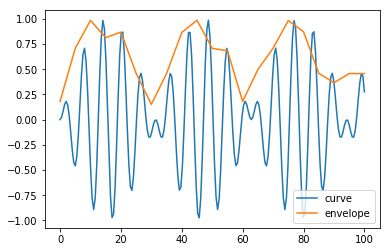

In [9]:
x = np.linspace(0, 100, num=200)
y = np.sin(x/10) * np.sin(x)
curve = Curve(x, y)
env = curve.envelope2(tc=5.0)

curve.plot(label='curve')
env.plot(label='envelope')
legend();

curve.diff()
------------

```
Computes the difference (derivative) of this curve.

:return: A Curve containing the derivative of this curve.
```

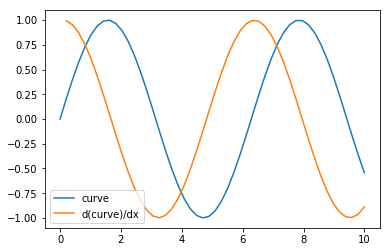

In [10]:
x = np.linspace(0, 10)
y = np.sin(x)
curve = Curve(x, y)
curve_diff = curve.diff()

curve.plot(label='curve')
curve_diff.plot(label='d(curve)/dx')
legend();

curve.interval(xmin=None, xmax=None, include_edges=True, interpolate=True)
--------------------------------------------------------------------------

```
Extracts a segment of the curve for xmin < x < xmax. If xmin or xmax
are not specified, they are considered the min(x) or max(x)
respectively.

:param xmin: Minimum x-axis value of the interval.
:param xmax: Maximum x-axis value of the interval.
:param include_edges: If xmin or xmax exceed the limits of the curve,
                      whether to include these limits or truncate
                      at the actual limits of the curve.
                      Default is True.
:param interpolate: If include_edge is True, whether to interpolate to
                    compute the extremes. Default is True.
:return: Curve for the specified interval.
```

curve.integrate()
-----------------

```
Generates a new Curve with the integral (trapezoidal)
of this Curve.

:return: A Curve containing the integral of this curve.
```

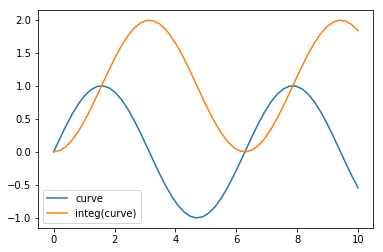

In [11]:
x = np.linspace(0, 10)
y = np.sin(x)
curve = Curve(x, y)
curve_integ = curve.integrate()

curve.plot(label='curve')
curve_integ.plot(label='integ(curve)')
legend();

curve.average()
---------------

```
Computes a curve whose value at any given x, are
the average of the y-axis values for all previous
values of x.

:return: Curve with the average of this Curve throughout x.
```

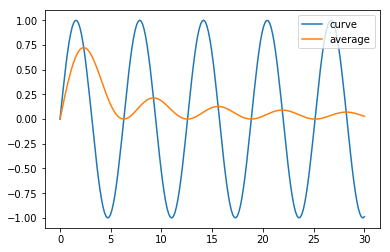

In [12]:
x = np.linspace(0, 30, num=200)
y = np.sin(x)
curve = Curve(x, y)
curve.plot(label='curve')
curve.average().plot(label='average')
legend();

curve.cross(edge=None)
----------------------

```
Computes the times (or x-axis values) at which this curve
crosses 0 (in y-axis values).

To compute the crossing of a different threshold,
shift the curve first:

    mycurve = Curve(x, y)
    cross_times = (mycurve - threshold).cross()

:param edge: Whether to get just rising or falling edges.
             Possible values are 'rise', 'fall' or None (default).
             If None, it computes both rising and falling edges.
:param which: Not implemented.
:return: 1-d Numpy array of values corresponding to when/where
         along the x-axis, the y-axis values cross 0.
```

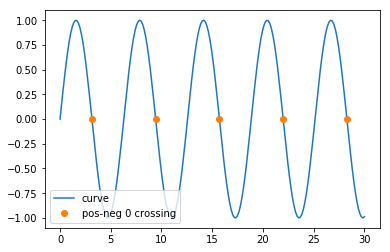

In [13]:
x = np.linspace(0, 30, num=200)
y = np.sin(x)
curve = Curve(x, y)
curve.plot(label='curve')

zero_cross = curve.cross(edge='fall')
plot(zero_cross, [0]*len(zero_cross), 'o', label='pos-neg 0 crossing')
legend(loc='lower left');

curve.period(threshold=None, verbose=False)
-------------------------------------------

```
Computes a curve with the period of this curve. The period
is defined as the time between rising edges crossing the
specified threshold. If not provided, it is set to the
curve's average. Values are defined at the time of the
threshold crossing and are with respect to the previous
threshold crossing.

:param verbose: If true, prints debug information.
:param threshold: Value of the curve at which it is considered
    to have completed/started a period.
:return: Period Curve.
```

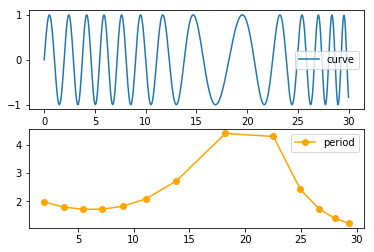

In [14]:
fig, ax = subplots(2, 1)

x = np.linspace(0, 30, num=500)
yp = 0.5 * np.sin(x/5)
y = np.sin((3+yp)*x)
curve = Curve(x, y)
curve.plot(ax=ax[0], label='curve')
ax[0].legend()

period = curve.period()
period.plot(ax=ax[1], color='orange', marker='o', label='period')
ax[1].legend();

curve.frequency(threshold=None, verbose=False)
----------------------------------------------

```
Computes the frequency of the signal/curve. This is computed
as 1/period. See Curve.period().

:param threshold: Threshold used for computing the period of each cycle.
:param verbose: Print out additional information.
:return: Curve containing the frequency of this curve as a function of X.
```

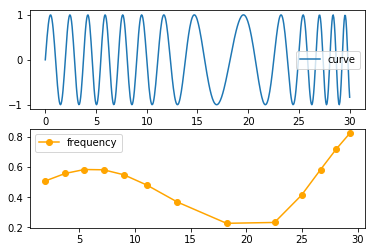

In [15]:
fig, ax = subplots(2, 1)

x = np.linspace(0, 30, num=500)
yp = 0.5 * np.sin(x/5)
y = np.sin((3+yp)*x)
curve = Curve(x, y)
curve.plot(ax=ax[0], label='curve')
ax[0].legend()

freq = curve.frequency()
freq.plot(ax=ax[1], color='orange', marker='o', label='frequency')
ax[1].legend();

curve.edgetime(edge='rise', lowfrac=0.1, highfrac=0.9)
------------------------------------------------------

```
Computes the rise/fall times of the signal/curve. 
The rise or fall times are defined as the time 
(X-axis interval) it takes for the signal value
(Y-axis value) to transition between lowfrac and 
highfrac fractions of the amplitude. The amplitude 
is determined as the difference between the absolute
minumum and maximum Y-axis values across all X-axis values.

:param edge: Which edge, 'rise' or 'fall'
:param lowfrac: Lower limit of the transition range as a fraction of the
                amplitude.
:param highfrac: Upper limit of the transition range as a fraction of the
                 amplitude.
:return: Curve containing the rise or fall times of this curve as a function of X.
         The X-axis values are specified for the end of the transition.
```

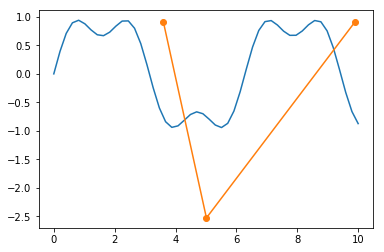

In [32]:
x = np.linspace(0, 10)
y = np.sin(x)
y2 = np.sin(3*x)
curve = Curve(x, y) + Curve(x, y2) / 3
curve_integ = curve.integrate()

curve.plot(label='curve')
curve.edgetime(edge='fall').plot(marker='o')

curve.plot()
------------

```
Plots the curve using matplotlib.pyplot.plot().

:param ax: If provided, plots on the given axes. Otherwise,
           uses the current axes.
:param xscale: Multiplier for x-axis values.
:param yscale: Multiplier for y-axis values.
:param kwargs: Additional keyword arguments passed to
               matplotlib.pyplot.plot().
```

## Curve.filter(self, fc, order=8, kind='low', fs=None)

```
Applies a digital filter to the curve. The filter is either
a high-pass or a low-pass filter as specified by the kind
parameter. The cut-off frequency is fc in Hz.
The curve is first resampled with a uniform sample spacing,
with a period of 1/fs.

At this time, the filter is a Butterworth filter and it is
applied in both directions in order to get 0 phase shift.

:param fc: 3-dB frequency in Hertz.
:param order: Order of the filter.
:param kind: 'low' or 'high' pass.
:param fs: (Re-) sampling frequency. If not supplied,
    it is computed as 20 * fc.
:return: Filtered Curve.
```

Example:

In [30]:
n = 1000
x = np.linspace(0, 10, num=n)
f0 = 0.3  # Hz
fc = 2 * f0  # Filter 3dB bandwidth

curve0 = Curve(x, np.sin(2 * np.pi * f0 * x))  # Noiseless
curven = Curve(x, np.random.randn(n))  # Noise
curve0n = curve0 + 0.5 * curven  # Noisy
curvefilt = curve0n.filter(fc)  # Filtered

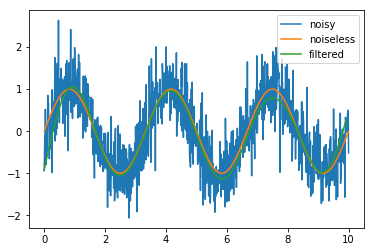

In [31]:
curve0n.plot(label='noisy')
curve0.plot(label='noiseless')
curvefilt.plot(label='filtered')
legend()